In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [204]:
dataFrame=pd.read_excel("ah_kalbimmm.xlsx")

In [205]:
dataFrame=dataFrame.drop("depresyon_ST",axis=1)

In [206]:
y=dataFrame["gogus_agrı_tipi"].values
x=dataFrame.drop("gogus_agrı_tipi",axis=1).values

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler=StandardScaler()

In [211]:
x_train=scaler.fit_transform(x_train)

In [212]:
x_test=scaler.fit_transform(x_test)

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [214]:
model=Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss='mean_squared_error')

In [215]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=130,verbose=1)

Epoch 1/130
25/25 [==============================] - 2s 15ms/step - loss: 1.7548 - val_loss: 1.5093
Epoch 2/130
25/25 [==============================] - 0s 4ms/step - loss: 1.3030 - val_loss: 1.1068
Epoch 3/130
25/25 [==============================] - 0s 5ms/step - loss: 1.0359 - val_loss: 0.9355
Epoch 4/130
25/25 [==============================] - 0s 5ms/step - loss: 0.9344 - val_loss: 0.8677
Epoch 5/130
25/25 [==============================] - 0s 5ms/step - loss: 0.8596 - val_loss: 0.8218
Epoch 6/130
25/25 [==============================] - 0s 4ms/step - loss: 0.8043 - val_loss: 0.7910
Epoch 7/130
25/25 [==============================] - 0s 4ms/step - loss: 0.7608 - val_loss: 0.7594
Epoch 8/130
25/25 [==============================] - 0s 4ms/step - loss: 0.7316 - val_loss: 0.7391
Epoch 9/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6986 - val_loss: 0.7178
Epoch 10/130
25/25 [==============================] - 0s 4ms/step - loss: 0.6769 - val_loss: 0.7038
Epoch 11

25/25 [==============================] - 0s 4ms/step - loss: 0.1452 - val_loss: 0.2665
Epoch 84/130
25/25 [==============================] - 0s 4ms/step - loss: 0.1396 - val_loss: 0.2691
Epoch 85/130
25/25 [==============================] - 0s 4ms/step - loss: 0.1368 - val_loss: 0.2825
Epoch 86/130
25/25 [==============================] - 0s 3ms/step - loss: 0.1323 - val_loss: 0.2601
Epoch 87/130
25/25 [==============================] - 0s 4ms/step - loss: 0.1317 - val_loss: 0.2552
Epoch 88/130
25/25 [==============================] - 0s 4ms/step - loss: 0.1286 - val_loss: 0.2535
Epoch 89/130
25/25 [==============================] - 0s 5ms/step - loss: 0.1261 - val_loss: 0.2553
Epoch 90/130
25/25 [==============================] - 0s 4ms/step - loss: 0.1216 - val_loss: 0.2492
Epoch 91/130
25/25 [==============================] - 0s 3ms/step - loss: 0.1193 - val_loss: 0.2401
Epoch 92/130
25/25 [==============================] - 0s 3ms/step - loss: 0.1183 - val_loss: 0.2405
Epoch 93/130


In [216]:
kayipVerisi=pd.DataFrame(model.history.history)

<Axes: >

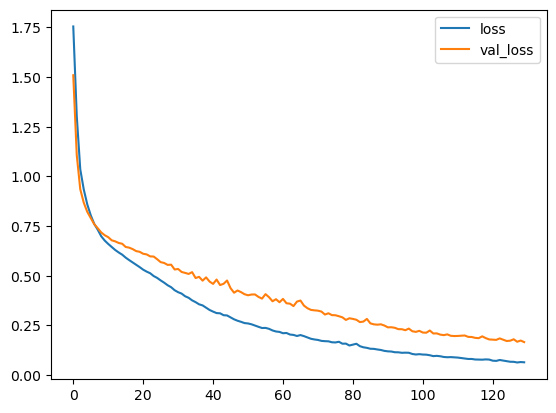

In [217]:
kayipVerisi.plot()

In [218]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [219]:
tahminDizisi=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [220]:
mae=mean_absolute_error(y_test,tahminDizisi)
mse=mean_squared_error(y_test,tahminDizisi)
print("Ortalama mutlak hata: ",mae)
print("Ortalama kare hatası: ",mse)

Ortalama mutlak hata:  0.27303700167685746
Ortalama kare hatası:  0.16582929746591407


In [221]:
tahminDf=pd.DataFrame(y_test,columns=["Gerçek Değerler"])

In [222]:
tahminDizisi.shape

(200, 1)

In [223]:
testDizisi=pd.Series(tahminDizisi.reshape(200,))

In [224]:
yuvarlanmis_degerler=[]
for value in testDizisi:
    rounded_num = round(value, 2)
    if rounded_num<=0.49:
        yuvarlanmis_degerler.append(0)
    elif (rounded_num>=0.50) and (rounded_num<=1.49):
        yuvarlanmis_degerler.append(1)
    elif (rounded_num>=1.50) and (rounded_num<=2.49):
        yuvarlanmis_degerler.append(2)
    else:
        yuvarlanmis_degerler.append(3)
        
testDizisi=pd.Series(yuvarlanmis_degerler)

In [225]:
tahminDf=pd.concat([tahminDf,testDizisi],axis=1)

In [226]:
tahminDf.columns=["Gerçek Değer","Tahmin Değerleri"]

In [227]:
tahminDf.head(20)

,Gerçek Değer,Tahmin Değerleri
0,0,0
1,0,0
2,0,0
3,2,1
4,2,2
5,0,0
6,0,0
7,2,2
8,2,2
9,0,1
